In [88]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 3.1

In [89]:
df = pd.read_csv("GOLD.csv")

In [90]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [91]:
df.shape

(512, 9)

In [92]:
df.dtypes #check dtypes of all columns

Date         object
Price         int64
Open          int64
High          int64
Low           int64
Vol.         object
Change %     object
Pred        float64
new         float64
dtype: object

In [93]:
df.isna().sum() #print number of null values in dataframe

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [94]:
df_1 = df.drop(["Date"], axis=1)
df_1["Date"] = pd.to_datetime(df["Date"])
df_1 = df_1.set_index('Date')
df_1.head() #setting index as date

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [95]:
df_2 = df.dropna(axis=0, how='any', subset=['Pred']) #dropping rows with NaN values
df_2.shape

(411, 9)

### Getting model Parameters

In [96]:
X = df_2[['Price','Open','High','Low']].values
y = df_2[['Pred']].values

In [97]:
model_1 = sm.OLS(y, X).fit()

In [98]:
print(f"The model parameters/coefficients are: {model_1.params}")

The model parameters/coefficients are: [ 2.  3. -1. -4.]


In [99]:
model_1.summary() #Print model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.867e+28
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                        0.00
Time:                        17:06:11   Log-Likelihood:                          9346.4
No. Observations:                 411   AIC:                                 -1.868e+04
Df Residuals:                     407   BIC:                                 -1.867e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0000   2.61e-14   7.67e+13      0.000       2.000       2.000
x2             3.0000   2.22e-14   1.35e+14      0.000       3.000       3.000
x3            -1.0000    2.6e-14  -3.85e+13      0.000      -1.000      -1.000
x4            -4.0000   2.65e-14  -1.51e+14      0.000      -4.000      -4.000
==============================================================================
Omnibus:                       64.945   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.706
Skew:                           0.022   Prob(JB):                     0.000389
Kurtosis:                       2.043   Cond. No.                     1.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Filling values in prediction column with obtained coefficients

In [100]:
X_all = df[['Price','Open','High','Low']].values

In [101]:
y_predict = model_1.predict(X_all)

In [102]:
df_3 = df_1.drop(['Pred'], axis=1)
df_3['Pred'] = y_predict

In [103]:
df_3.head()

,Price,Open,High,Low,Vol.,Change %,new,Pred
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,117.570740,738.0
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,295.430176,-146.0
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,132.123714,30.0
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,101.298064,357.0
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,112.153318,124.0


In [104]:
df_3.shape

(512, 8)

In [105]:
df_3.isna().sum() #print number of null values in dataframe

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
new         0
Pred        0
dtype: int64

### Tying to fit "new" column values using linear regression

In [106]:
y = df_3['new'].values

In [107]:
model_2 = sm.OLS(y, X_all).fit()

In [108]:
print(f"The model parameters/coefficients are: {model_2.params}")

The model parameters/coefficients are: [ 1.01294539 -1.0003801   1.00502126 -1.01763769]


In [109]:
model_2.summary() #Print model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.713e+07
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                        0.00
Time:                        17:06:12   Log-Likelihood:                         -538.22
No. Observations:                 512   AIC:                                      1084.
Df Residuals:                     508   BIC:                                      1101.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0129      0.000   2213.155      0.000       1.012       1.014
x2            -1.0004      0.000  -2595.620      0.000      -1.001      -1.000
x3             1.0050      0.000   2296.325      0.000       1.004       1.006
x4            -1.0176      0.000  -2242.627      0.000      -1.019      -1.017
==============================================================================
Omnibus:                      542.204   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75242.149
Skew:                           4.362   Prob(JB):                         0.00
Kurtosis:                      61.744   Cond. No.                     1.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
y_predict = model_2.predict(X_all)

In [111]:
df_4 = df_3.drop(['new'], axis=1)
df_4['new'] = y_predict

In [112]:
df_4.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,118.172212
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.435514
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,131.623174
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.173626
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,111.704253


### Comparing actual and predicted 'new' column values

In [113]:
new_act = df_3.filter(['new'])
new_act.rename(columns = {'new':'new_act'}, inplace = True)
new_pred = df_4.filter(['new'])
new_pred.rename(columns = {'new':'new_pred'}, inplace = True)
new_compare = pd.concat([new_act['new_act'], new_pred['new_pred']], axis=1)

In [114]:
new_compare.head()

,new_act,new_pred
Date,,
2017-05-04,117.570740,118.172212
2017-05-05,295.430176,295.435514
2017-05-08,132.123714,131.623174
2017-05-09,101.298064,101.173626
2017-05-10,112.153318,111.704253


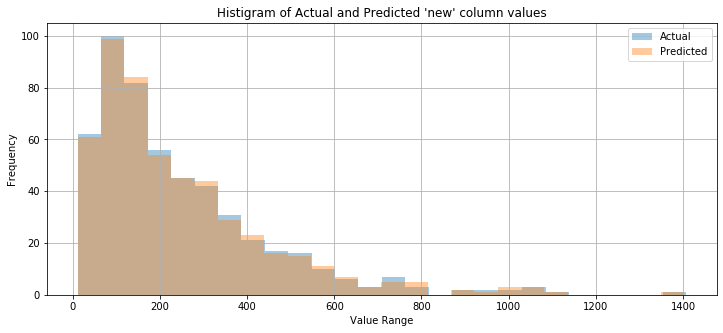

In [115]:
plt.figure(figsize=(12,5))
sns.distplot(new_compare['new_act'], kde=False)
sns.distplot(new_compare['new_pred'], kde=False)
plt.legend(['Actual','Predicted'])
plt.title("Histigram of Actual and Predicted 'new' column values")
plt.grid()
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.show()

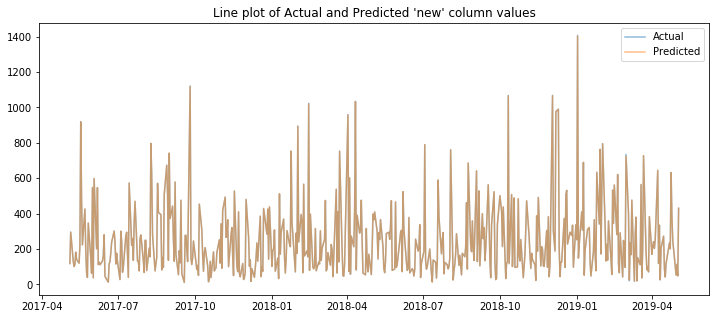

In [116]:
plt.figure(figsize=(12,5))
plt.plot(new_act, alpha=0.5)
plt.plot(new_pred, alpha=0.5)
plt.title("Line plot of Actual and Predicted 'new' column values")
plt.legend(['Actual','Predicted'])
plt.show()

Form the above Histogram of Actual and Predicted values using a linear model, it can be observed that the predictions are not 100% accurate. This indicates that the relation between OHLC prices and 'new' column values are not linear. However the linear model is able to predict the 'new' column values fairly accurately. Which is observed as in the line plot above.

### Comparing Actual 'Pred' column and OLS fitted 'Pred' Column

In [117]:
act_pred = df_1.filter(['Pred'])
act_pred.rename(columns = {'Pred':'Act_Pred'}, inplace = True)
ols_pred = df_3.filter(['Pred'])
ols_pred.rename(columns = {'Pred':'OLS_Pred'}, inplace = True)
pred_compare = pd.concat([act_pred['Act_Pred'], ols_pred['OLS_Pred']], axis=1)

In [118]:
pred_compare.head()

,Act_Pred,OLS_Pred
Date,,
2017-05-04,738.0,738.0
2017-05-05,-146.0,-146.0
2017-05-08,30.0,30.0
2017-05-09,357.0,357.0
2017-05-10,124.0,124.0


The 'Pred' column on the other hand can said to be following a linear relation, because the model fitted exactly matches the actual values.

# 3.2

The Beta value is the slope of regression line obtained from the data - percentage change in stock price vs percentage change in becnchmark stock (ie: nifty50)

In [119]:
nifty = pd.read_csv("Nifty50.csv").filter(['Date','Close'])
mnm = pd.read_csv("M&M.csv").filter(['Date','Close Price'])
nifty['Date'] = nifty['Date'].astype('Datetime64')
mnm['Date'] = mnm['Date'].astype('Datetime64')

In [120]:
mnm.rename(columns = {'Close Price':'mnm'},inplace = True)
mnm = mnm.set_index('Date')
nifty.rename(columns = {'Close':'nifty'},inplace = True)
nifty = nifty.set_index('Date')

In [121]:
frames = [mnm, nifty]
df_5 = pd.concat(frames, axis  = 1)

In [122]:
df_5['mnm_perc'] = df_5['mnm'].pct_change()
df_5['nifty_perc'] = df_5['nifty'].pct_change()
df_5 = df_5.dropna()

In [123]:
df_5.head()

,mnm,nifty,mnm_perc,nifty_perc
Date,,,,
2017-05-16,1366.35,9512.25,-0.006760,0.007078
2017-05-17,1378.80,9525.75,0.009112,0.001419
2017-05-18,1352.85,9429.45,-0.018821,-0.010109
2017-05-19,1333.40,9427.90,-0.014377,-0.000164
2017-05-22,1306.25,9438.25,-0.020361,0.001098


In [124]:
df_5.tail()

,mnm,nifty,mnm_perc,nifty_perc
Date,,,,
2019-05-07,636.00,11497.90,-0.003915,-0.008652
2019-05-08,621.65,11359.45,-0.022563,-0.012041
2019-05-09,625.45,11301.80,0.006113,-0.005075
2019-05-10,628.75,11278.90,0.005276,-0.002026
2019-05-13,617.60,11148.20,-0.017734,-0.011588


### Calculating beta value for the last 3 months

In [125]:
df_6 = df_5.last('3M') #last 3 months data

In [126]:
X1_3m = df_6['nifty_perc'].values
X2_3m = df_6['mnm_perc'].values

In [127]:
model_3 = sm.OLS(X2_3m,X1_3m).fit()

In [128]:
print(f'Beta value for daily returns in the last 3 months is: {model_3.params}')

Beta value for daily returns in the last 3 months is: [0.76967366]


The low beta value for last 3 months implies that the stock is stable and has low volatility.

### Calculating monthly beta value

In [129]:
df_7 = df_5.copy()

In [130]:
df_7['year'] = df_7.index.year.values
df_7['month'] = df_7.index.month.values
df_7['day'] = df_7.index.day.values

In [131]:
df_8 = df_7.groupby(['year','month','day']).sum()

In [132]:
df_8.head()

mnm    nifty  mnm_perc  nifty_perc
year month day                                        
2017 5     16   1366.35  9512.25 -0.006760    0.007078
           17   1378.80  9525.75  0.009112    0.001419
           18   1352.85  9429.45 -0.018821   -0.010109
           19   1333.40  9427.90 -0.014377   -0.000164
           22   1306.25  9438.25 -0.020361    0.001098

In [133]:
beta_vals = []

# for the year 2017
for i in range(5,13):
    df_9 = df_8.loc[(2017, i)]
    X1_m = df_9['nifty_perc'].values
    X2_m = df_9['mnm_perc'].values
    model_4 = sm.OLS(X2_m,X1_m).fit()
    beta_vals.append(model_4.params[0])
    
# for year 2018
for i in range(1,13):
    df_9 = df_8.loc[(2018, i)]
    X1_m = df_9['nifty_perc'].values
    X2_m = df_9['mnm_perc'].values
    model_4 = sm.OLS(X2_m,X1_m).fit()
    beta_vals.append(model_4.params[0])
    
# for year 2019
for i in range(1,6):
    df_9 = df_8.loc[(2019, i)]
    X1_m = df_9['nifty_perc'].values
    X2_m = df_9['mnm_perc'].values
    model_4 = sm.OLS(X2_m,X1_m).fit()
    beta_vals.append(model_4.params[0])

In [134]:
df_10 = df_8.groupby(['year','month']).sum()
df_10['beta'] = beta_vals

In [135]:
df_10

mnm      nifty  mnm_perc  nifty_perc      beta
year month                                                     
2017 5      16184.50  114035.85  0.031553    0.018712  0.744076
     6      29344.30  201746.05 -0.048857   -0.010363  1.140030
     7      29051.45  206852.50  0.040682    0.057063  0.398686
     8      29026.10  207924.85 -0.041598   -0.015394  0.372477
     9      27110.50  209536.25 -0.068019   -0.012715  0.756326
     10     26800.50  202773.55  0.071220    0.054643  0.788550
     11     30756.95  227144.60  0.046263   -0.010216  0.438457
     12     24595.90  206445.25 -0.413000    0.029696  1.611482
2018 1      16691.20  236965.40  0.016663    0.046422  0.596886
     2      14102.90  200129.00 -0.043416   -0.048928  1.045310
     3      13951.95  194419.75  0.015903   -0.036035  0.608811
     4      16872.85  219931.60  0.169553    0.060431  1.510785
     5      18886.75  234617.85  0.058386    0.000135  1.220367
     6      19050.45  225602.45 -0.025635   -0.001670  0.760974
     7      20116.60  241805.45  0.043371    0.058512  0.722422
     8      19994.05  241467.25  0.031815    0.028445  0.640509
     9      16715.15  203347.05 -0.109639   -0.065655  1.545276
     10     15956.80  218060.00 -0.109014   -0.048814  1.358097
     11     15447.55  212435.85  0.035193    0.046653  1.788871
     12     15217.55  215568.85  0.019768   -0.000413  1.190203
2019 1      16463.45  248617.65 -0.163816   -0.002349  1.177612
     2      14375.40  238197.85 -0.048646   -0.003187  1.316557
     3      13476.05  226381.85  0.043958    0.074713  0.967400
     4      12688.70  221662.60 -0.042247    0.011053  0.511614
     5       5059.65   91621.50 -0.043352   -0.052174  1.193958

In [136]:
df_11 = df_10.filter(['beta'])

Text(0.5, 1.0, 'Beta values vs Months')

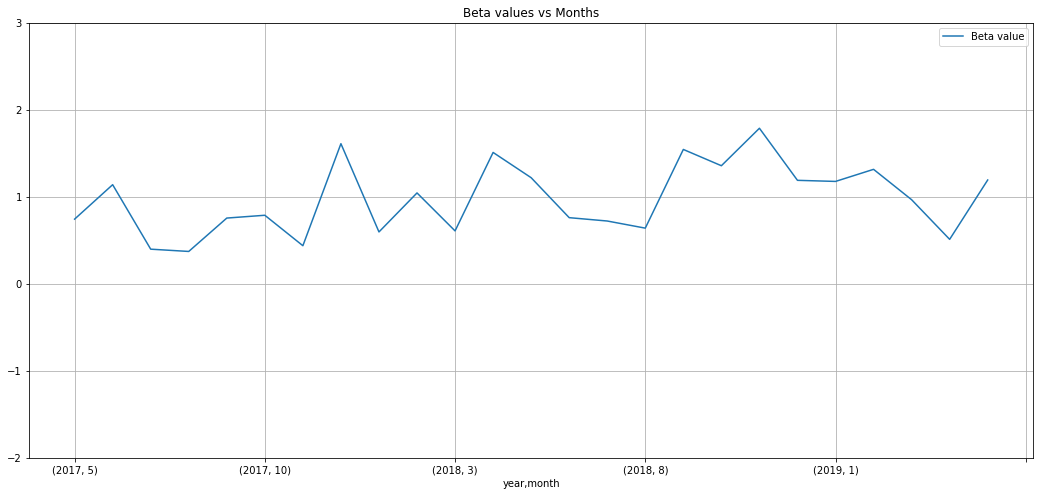

In [87]:
df_11.plot(figsize = (18,8))
plt.legend(['Beta value'])
plt.grid()
plt.yticks(range(-2,4))
plt.title('Beta values vs Months')

From the above plot of beta values w.r.t months, we can see it consistently stays in between 0 and 2. Most of the time beta stays below 1 which means the stock is less volatile. The positive value of beta implies that the rise in market increases the stock price. There are no negative values for beta in this case, which means the inverse cases of market vs stock price variation does not occur.